In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import joblib
import warnings 
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, r2_score, max_error
from sklearn.ensemble import RandomForestClassifier



# Read the CSV and Perform Basic Data Cleaning

In [4]:
df = pd.read_csv("data/exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Select your features (columns)

In [ ]:
df.describe().T

In [ ]:
sns.heatmap(df.corr(), cmap='RdYlGn')

In [ ]:
selected_features = df[["koi_period","koi_period_err1","koi_period_err2","koi_time0bk","koi_time0bk_err1",
                     "koi_steff_err2","koi_slogg","koi_slogg_err1","koi_slogg_err2","koi_srad",
                     "koi_srad_err1","koi_srad_err2","ra","dec","koi_kepmag"]]

In [ ]:
selected_features.corr()

In [ ]:
sns.heatmap(selected_features.corr(), cmap='RdYlGn')

In [ ]:
# Check for null values
df.info(verbose=True)

In [ ]:
df.shape

In [ ]:
df.isnull().sum()

In [ ]:
sns.countplot(df['koi_disposition'])

In [ ]:
# Set features. This will also be used as your x values.


# Create a Train Test Split

Use `koi_disposition` for the y values

In [5]:
# create features
X = df.drop("koi_disposition", axis=1)
feature_names = X.columns
# create labels
y = df["koi_disposition"]

print("Shape: ", X.shape, y.shape)


Shape:  (6991, 40) (6991,)


In [6]:
# split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [ ]:
X_train.head()

# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [7]:
# scale the data
X_scaler = MinMaxScaler().fit(X_train)


In [8]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


# Train the Model



In [9]:
# create a Gaussian Classifier with default n_esimators value
model = RandomForestClassifier(n_estimators = 100)

# train the model
model = model.fit(X_train_scaled, y_train)

print(f"Training Data Score: {model.score(X_train_scaled, y_train):.4f}")
print(f"Testing Data Score: {model.score(X_test_scaled, y_test):.4f}")


Training Data Score: 1.0000
Testing Data Score: 0.8907


In [10]:
# predict test data set
y_pred = model.predict(X_test_scaled)


In [11]:
# check performance of model with classification report
print(classification_report(y_test, y_pred))


                precision    recall  f1-score   support

     CANDIDATE       0.83      0.73      0.78       422
     CONFIRMED       0.79      0.84      0.81       450
FALSE POSITIVE       0.97      1.00      0.98       876

      accuracy                           0.89      1748
     macro avg       0.86      0.85      0.86      1748
  weighted avg       0.89      0.89      0.89      1748



In [12]:
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)


Predicted,CANDIDATE,CONFIRMED,FALSE POSITIVE,All
True,,,,
CANDIDATE,308,100,14,422
CONFIRMED,61,377,12,450
FALSE POSITIVE,2,2,872,876
All,371,479,898,1748


In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))


In [23]:
importances = model.feature_importances_
feature_imp = pd.Series(model.feature_importances_, index = feature_names).sort_values(ascending=False)


No handles with labels found to put in legend.


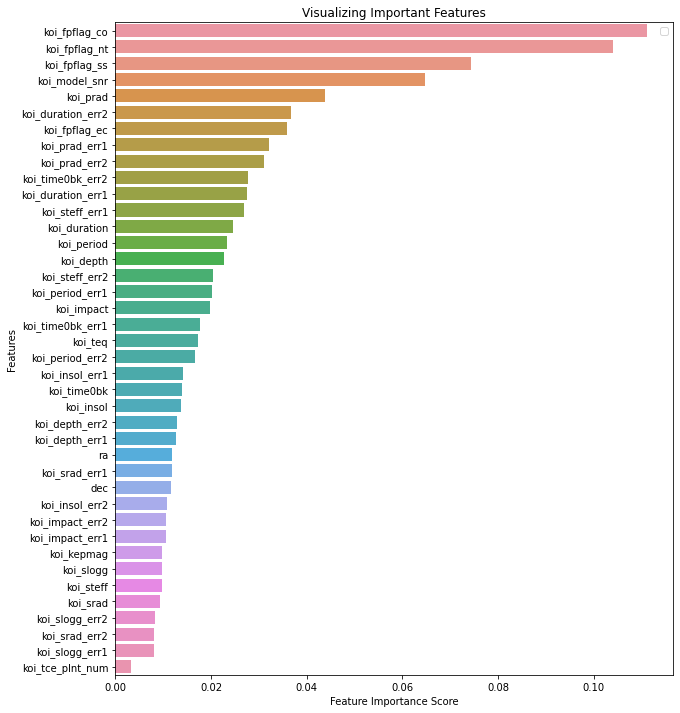

In [14]:
# Creating a bar plot
plt.figure(figsize=(10,12))
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [15]:
# example of grid searching key hyperparametres for KNeighborsClassifier
max_features = []

# set range 1 to half the number of input features ie 20
for i in range(1,20):
    max_features.append(i)

# define grid search
param_grid = {'max_features': max_features, 
              'n_estimators': [100, 200],
             }


In [16]:
grid = GridSearchCV(model, param_grid, n_jobs = -1, verbose = 3)


In [ ]:
grid.get_params(deep=True)

In [17]:
# Train the model with GridSearch (cross validate to determine hyper parameter values for best accuracy)
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 38 candidates, totalling 190 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 190 out of 190 | elapsed:  5.3min finished


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19],
                         'n_estimators': [100, 200]},
             verbose=3)

In [18]:
print(grid.best_params_)
print(grid.best_score_)
print(grid.best_estimator_)

{'max_features': 15, 'n_estimators': 200}
0.9046367314563488
RandomForestClassifier(max_features=15, n_estimators=200)


In [19]:
print(f"Training Data Score: {grid.score(X_train_scaled, y_train):.4f}")
print(f"Testing Data Score: {grid.score(X_test_scaled, y_test):.4f}")

Training Data Score: 1.0000
Testing Data Score: 0.8993


In [20]:
# Make predictions with the hypertuned model
predictions = grid.predict(X_test_scaled)

In [21]:
# check performance of model with classification report
print(classification_report(y_test, predictions))

                precision    recall  f1-score   support

     CANDIDATE       0.83      0.77      0.80       422
     CONFIRMED       0.80      0.83      0.82       450
FALSE POSITIVE       0.98      1.00      0.99       876

      accuracy                           0.90      1748
     macro avg       0.87      0.87      0.87      1748
  weighted avg       0.90      0.90      0.90      1748



In [22]:
confusion_matrix(y_test, predictions)
pd.crosstab(y_test, predictions, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,CANDIDATE,CONFIRMED,FALSE POSITIVE,All
True,,,,
CANDIDATE,325,92,5,422
CONFIRMED,63,373,14,450
FALSE POSITIVE,2,0,874,876
All,390,465,893,1748


# Save the Model

In [ ]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash

filename = 'your_name.sav'
joblib.dump(your_model, filename)